In [1]:
#module
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [2]:
def draw_city_graph(coord_cities, solutions=None):

    # Draw highlighted edges for each road
    if solutions is not None:
        # Extended color palette
        colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                  'tab:gray', 'tab:olive', 'tab:cyan'])

        for route in solutions:
            highlighted_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
            highlighted_edges = [tuple(edge) for edge in highlighted_edges]
            # Get the next color in the iterable
            color = next(colors)  
            for edge in highlighted_edges:
                x = [coord_cities[edge[0]][0], coord_cities[edge[1]][0]]
                y = [coord_cities[edge[0]][1], coord_cities[edge[1]][1]]
                plt.plot(x, y, color=color, linewidth=2)

    # Drawing nodes
    x = [coord[0] for coord in coord_cities.values()]
    y = [coord[1] for coord in coord_cities.values()]
    plt.scatter(x, y, s=100, c='k')

    plt.xlim(0, 100)  # X-axis values (x)
    plt.ylim(0, 100)  # Y-axis values (y)

    plt.axis('on')  # Show chart scale
    plt.show()

In [3]:

def generate_city_distances(num_cities):

    
    # Generation of city names as letters
    cities = [chr(ord('A')+i ) for i in range(num_cities-1)]
    
    # Generation of random coordinates for each city
    city_coordinates = {}

    for city in cities:
        if city == "A" :
            x = 50
            y = 50
            city_coordinates["A"] = (x, y)
        else :
            x = random.randint(0,100)
            y = random.randint(0,100)
            city_coordinates[city] = (x, y)
    
    
    # Calculation of distances between cities
    city_distances = {}
    for city1 in cities:
        city_distances[city1] = {}
        for city2 in cities:
            if city1 == city2:
                # Null distance for the same city (ignored in the graph)
                distance = float('inf')  
                
            else:
                distance = calculate_distance(city_coordinates[city1], city_coordinates[city2])
                
                    
            city_distances[city1][city2] = distance
    
    # Generation of the distance matrix
    distance_matrix = np.zeros((num_cities, num_cities))
    for i, city1 in enumerate(cities):
        for j, city2 in enumerate(cities):
            distance_matrix[i][j] = city_distances[city1][city2]
    
    return city_distances, distance_matrix, city_coordinates


def calculate_distance(coord1, coord2):
    # Calculation of the Euclidean distance between two coordinates
    x1, y1 = coord1
    x2, y2 = coord2
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return int(distance)



In [4]:
def generate_nearest_neighbor_individual(city_distances,  nbrCamions):
        cities = list(city_distances.keys())
        # Initialize the truck to the starting city
        individual = [[cities[0]] for _ in range(nbrCamions)]
        cities_copy = cities[1:]  # Crée une copie des villes à visiter

        # Assign cities to each truck until there are none left
        while cities_copy:
            for i in range(nbrCamions):
                if cities_copy:  # s'il reste des villes à assigner
                    current_city = individual[i][-1]
                    nearest_city = min(cities_copy, key=lambda city: city_distances[current_city][city])
                    individual[i].append(nearest_city)
                    cities_copy.remove(nearest_city)

        # Add the departure city at the end of each route
        for i in range(nbrCamions):
            individual[i].append(cities[0])

        return individual




End solution :
Numbers of trucks :  2
Numbers of cities :  99
  Max weights: 586
  Min weights: 575
  Sum weights: 1161
  Difference max-min: 11


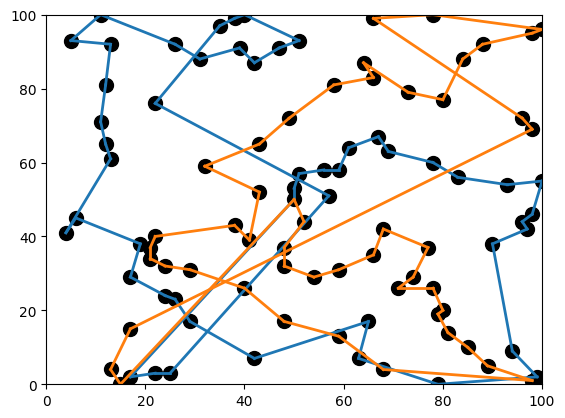

In [5]:
#  Model Parameters
nbrCamionsList = [2]#[2, 3, 5, 7]
# must be greater than 2*nbrTrucks+1
num_citiesList = [99]#[20, 50, 100, 500, 1000, 3000]   

for num_cities in num_citiesList:
    for nbrCamions in nbrCamionsList:

        city_distances, matrix, coord_cities = generate_city_distances(num_cities)

        max_weights = []
        min_weights = []
        sum_weights = []

        best_solution = generate_nearest_neighbor_individual(city_distances, nbrCamions)

        total_weights = []
        for route in best_solution:
            total_weight = 0
            for i in range(len(route) - 1):
                city1 = route[i]
                city2 = route[i + 1]
                total_weight += city_distances[city1][city2]
            total_weights.append(total_weight)

        max_weights.append(max(total_weights))
        min_weights.append(min(total_weights))
        sum_weights.append(sum(total_weights))

        print("End solution :")
        print ("Numbers of trucks : ", nbrCamions)
        print ("Numbers of cities : ", num_cities)
        print("  Max weights:", max(total_weights))
        print("  Min weights:", min(total_weights))
        print("  Sum weights:", sum(total_weights))
        print("  Difference max-min:", max(total_weights) - min(total_weights))
        if num_cities < 1000:
            draw_city_graph(coord_cities, best_solution)


        plt.show()
